In [11]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [12]:
df = pd.read_csv('heart.csv')

# Attribute Information:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

## EDA

In [13]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [14]:
df.shape

(918, 12)

In [15]:
Total_columns = df.columns
Total_columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
print(df.ChestPainType.unique(),
      df.Sex.unique(),
      df.RestingECG.unique(), 
      df.ExerciseAngina.unique(), 
      df.ST_Slope.unique())

['ATA' 'NAP' 'ASY' 'TA'] ['M' 'F'] ['Normal' 'ST' 'LVH'] ['N' 'Y'] ['Up' 'Flat' 'Down']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
df.describe()#outliers are present


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [21]:
df['Sex'].value_counts(normalize = True)

Sex
M    0.78976
F    0.21024
Name: proportion, dtype: float64

In [22]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [23]:
filt = (df['ChestPainType'] == 'ASY')
df.loc[filt]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
13    49   M           ASY        140          234          0     Normal   
16    38   M           ASY        110          196          0     Normal   
18    60   M           ASY        100          248          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
909   63   F           ASY        124          197          0     Normal   
911   59   M           ASY        164          176          1        LVH   
912   57   F           ASY        140          241          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
3      108              Y      1.5     Flat             1  
8      130              Y      1.5     Flat             1  
13     140              Y      1.0     Flat             1  
16     166              N      0.0     Flat             1  
18     125              N      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
909    136              Y      0.0     Flat             1  
911     90              N      1.0     Flat             1  
912    123              Y      0.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  

[496 rows x 12 columns]

## Working with multiple columns


In [24]:
df.values

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [25]:
df.values.shape

(918, 12)

In [26]:
df_new = df.values
df_new

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [27]:
#2 how many males are there with chestpain type = 'ASY' and with cholestrol > 160? --->295 rows

cnt = 0
for i in df_new:
    if i[1] == 'M' and i[2] == 'ASY' and i[4] >160:
        cnt+=1
        
print(cnt)
    

295


## CONDITION BASED -- USING MULTIPLE COLUMNS

In [28]:
#chest type = 'ASY' and RestingECG should be normal -->281rows

df_1 = df[df['ChestPainType'] == 'ASY']
df_proc = df_1[df_1['RestingECG'] == 'Normal']
df_proc

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
13    49   M           ASY        140          234          0     Normal   
16    38   M           ASY        110          196          0     Normal   
18    60   M           ASY        100          248          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
907   44   M           ASY        120          169          0     Normal   
909   63   F           ASY        124          197          0     Normal   
912   57   F           ASY        140          241          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
3      108              Y      1.5     Flat             1  
8      130              Y      1.5     Flat             1  
13     140              Y      1.0     Flat             1  
16     166              N      0.0     Flat             1  
18     125              N      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
907    144              Y      2.8     Down             1  
909    136              Y      0.0     Flat             1  
912    123              Y      0.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  

[284 rows x 12 columns]

In [29]:
#2 how many males are there with chestpain type = 'ASY' and with cholestrol > 160? --->295 rows

df_2 = df[df['Sex'] == 'M']
df_2proc = df_2[df_2['ChestPainType'] == 'ASY']
#print(len(df_2proc[df_2proc['Cholesterol'] > 160]))

df_2final = df_2proc[df_2proc['Cholesterol'] > 160]
df_2final

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
8     37   M           ASY        140          207          0     Normal   
13    49   M           ASY        140          234          0     Normal   
16    38   M           ASY        110          196          0     Normal   
18    60   M           ASY        100          248          0     Normal   
26    53   M           ASY        124          260          0         ST   
..   ...  ..           ...        ...          ...        ...        ...   
900   58   M           ASY        114          318          0         ST   
907   44   M           ASY        120          169          0     Normal   
908   63   M           ASY        140          187          0        LVH   
911   59   M           ASY        164          176          1        LVH   
914   68   M           ASY        144          193          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
8      130              Y      1.5     Flat             1  
13     140              Y      1.0     Flat             1  
16     166              N      0.0     Flat             1  
18     125              N      1.0     Flat             1  
26     112              Y      3.0     Flat             0  
..     ...            ...      ...      ...           ...  
900    140              N      4.4     Down             1  
907    144              Y      2.8     Down             1  
908    144              Y      4.0       Up             1  
911     90              N      1.0     Flat             1  
914    141              N      3.4     Flat             1  

[295 rows x 12 columns]

# VISUALISATIONS

Scatter plots are useful for visualizing the relationship between two numerical variables. For example, you could use a scatter plot to visualize the relationship between age and cholesterol levels in a heart disease dataset.

Line plots are similar to scatter plots, but they show the trends in the data over time. For example, you could use a line plot to visualize changes in blood pressure over time.

Bar plots are useful for comparing the values of a categorical variable between different groups. For example, you could use a bar plot to compare the prevalence of heart disease among different age groups.

Histograms are useful for visualizing the distribution of a numerical variable. For example, you could use a histogram to visualize the distribution of cholesterol levels in a heart disease dataset.

Overall, the key to effective data visualization is to choose the right type of plot for the data you are working with, and to use clear and informative labels and titles to help communicate your insights to others.

We are going to divide the project into 6 parts:

Heart Disease EDA - Age (DistPlot)

Heart Disease EDA - Categorical Columns (Pie Charts)

Heart Disease EDA - ViolinPlot

Heart Disease EDA - Correlation (HeatMap)

Heart Disease EDA - Corrlation (PairPlot)

Heart Disease EDA - Correlation - (JointPlot)
 

## Group by - Categorical Columns (Pie Charts)

<Axes: >

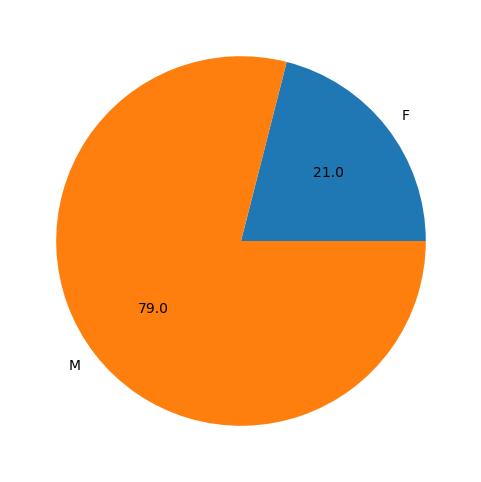

In [30]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

With the help of pie chart we can see that 79% of the people who are having heart disease are males and 21% are females in our dataset.

<Axes: >

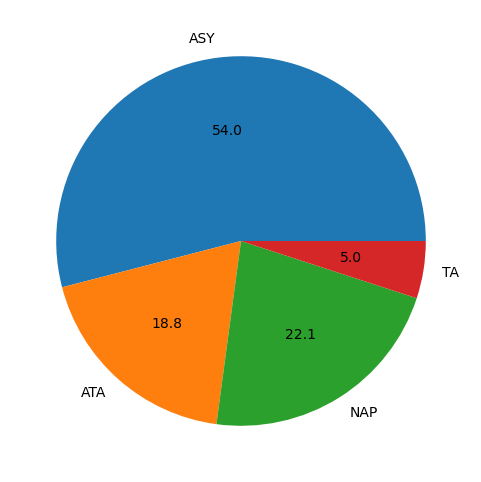

In [31]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

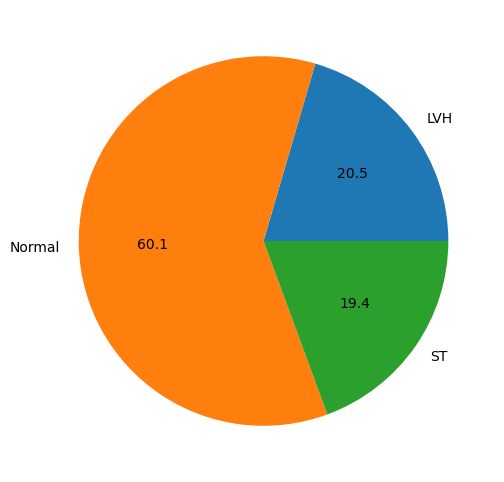

In [32]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

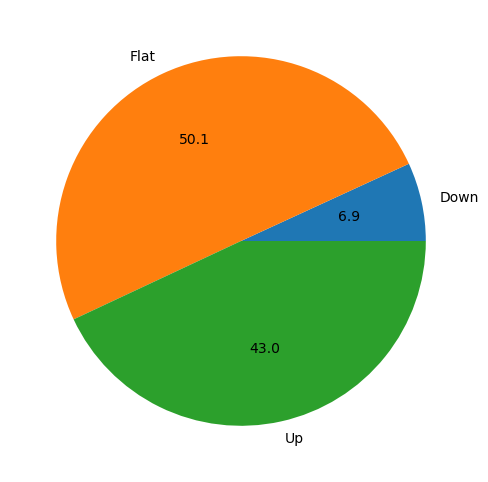

In [33]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

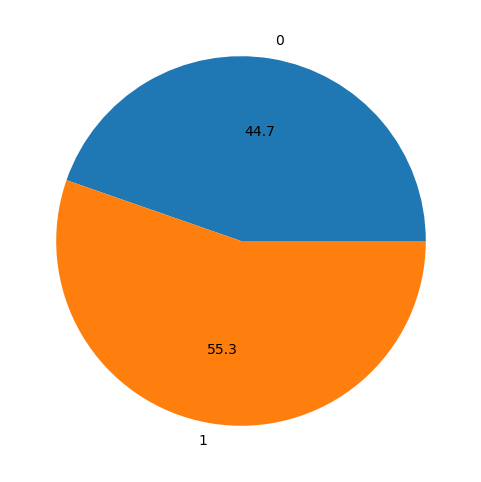

In [34]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

With the help of pie chart we can see that 55.3% of the people who are having heart disease in our dataset.

## Violin Plot

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. 
It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, 
violin plots depict summary statistics and the density of each variable.


<Axes: xlabel='Age'>

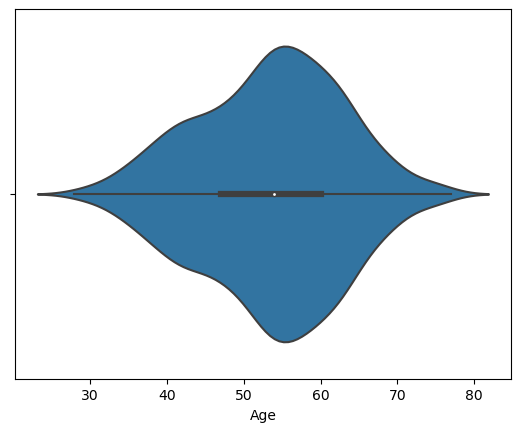

In [35]:
sns.violinplot(x = df['Age'])

<Axes: xlabel='HeartDisease', ylabel='Sex'>

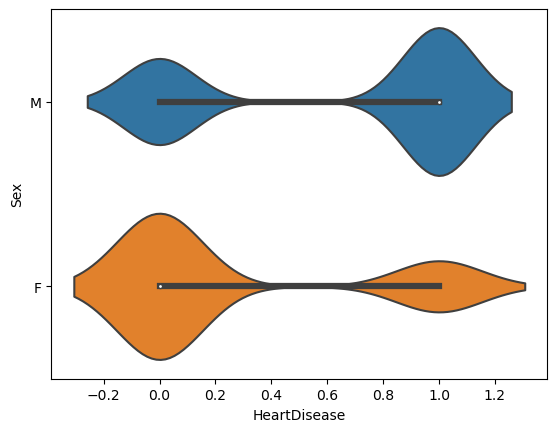

In [36]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

So from this we can see there are more males who are having the chances of having a heart disease compared to females.

<Axes: xlabel='HeartDisease', ylabel='Age'>

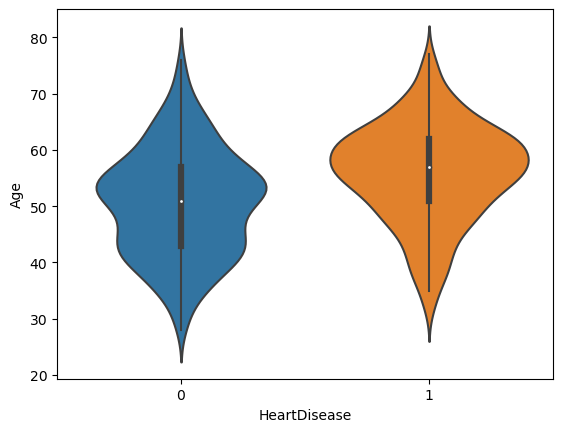

In [37]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

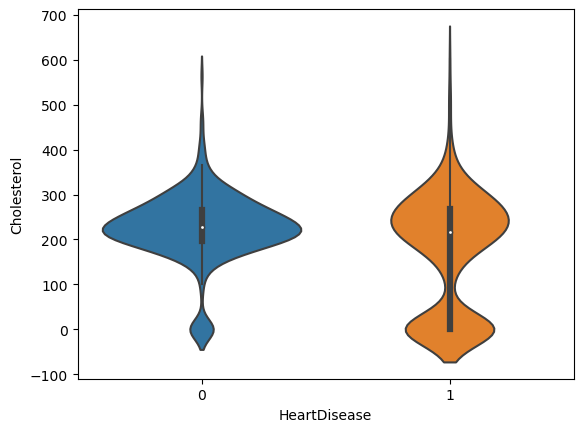

In [38]:
sns.violinplot(y = df['Cholesterol'], x = df['HeartDisease'])

# Distribution Plot

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


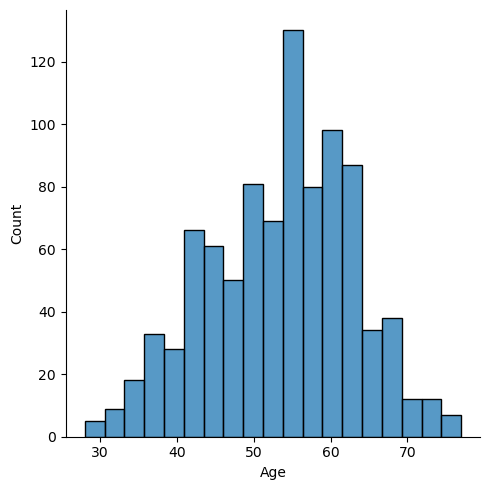

In [39]:
sns.displot(df['Age'],kde = False)

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


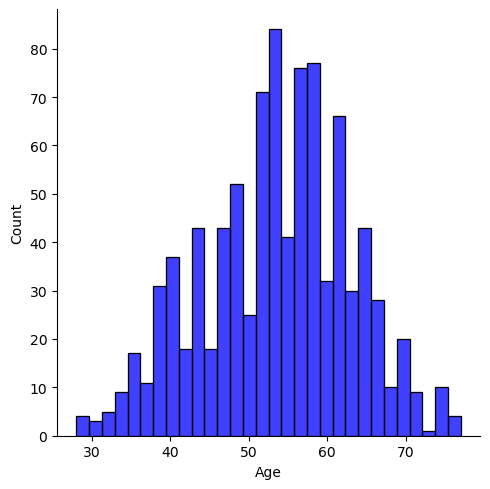

In [40]:
sns.displot(df['Age'],bins =30,color = 'blue')


So after doing the visualization we can infer that minimum age is around 30 and maximum age is around 80. Maximum of the data falls within the range of 40 to 70.

 

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


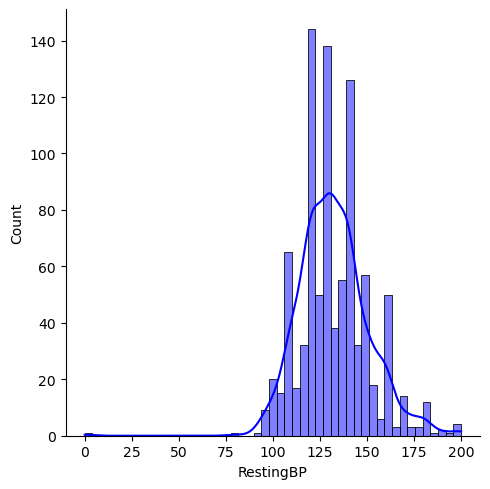

In [41]:
sns.displot(df['RestingBP'],kde = True,color = 'blue')

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


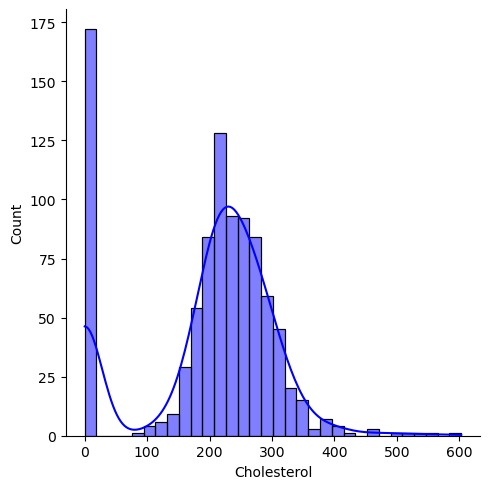

In [42]:
sns.displot(df['Cholesterol'], kde = True, color = 'blue')

Average cholesterol is abt 130 and most of the people have 0%cholesterol

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


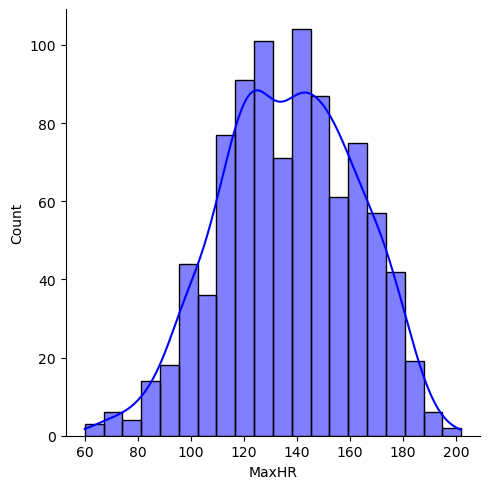

In [43]:
sns.displot(df['MaxHR'], kde = True, color = 'blue')

C:\Users\sreev\AppData\Local\Temp\ipykernel_11336\1775940942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde = False,hist = False,rug = True)


<Axes: xlabel='Age'>

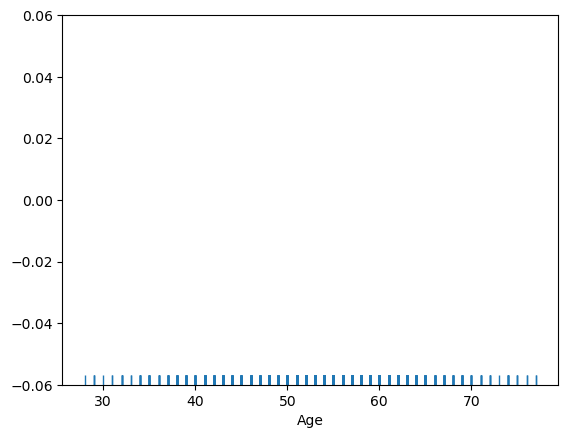

In [44]:
#density
sns.distplot(df['Age'],kde = False,hist = False,rug = True)

C:\Users\sreev\AppData\Local\Temp\ipykernel_11336\2483466236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins = 30)


<Axes: xlabel='Age', ylabel='Density'>

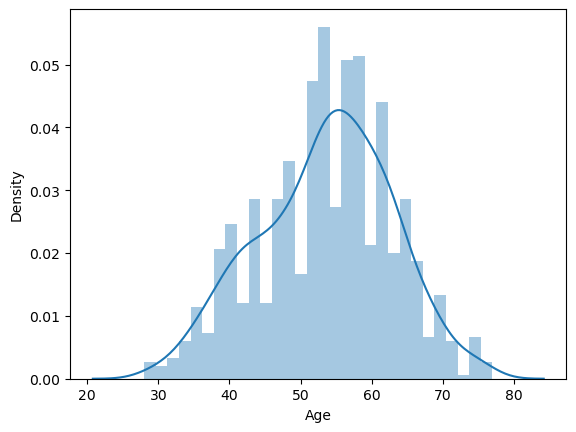

In [45]:
sns.distplot(df['Age'],bins = 30)

#more bins means more density the plot will be

# Ploting the KDE plot for checking the distribution on the data

<Axes: xlabel='Cholesterol', ylabel='Density'>

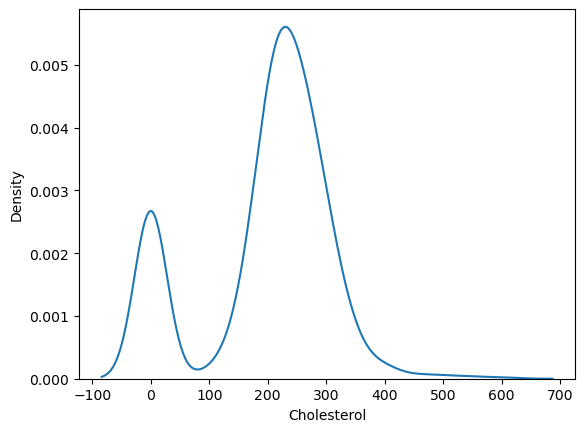

In [46]:
sns.kdeplot(data = df, x = 'Cholesterol')

## Correlation (HeatMap)

In [47]:
'''Age  BirthYr Sal    loc
23   1999     17    hyd
27   1993     23    delhi
40   1975     40    bang
5     2017    0     pune


- age & sal has +ve correlation
- age & loc zero correlation'''

'Age  BirthYr Sal    loc\n23   1999     17    hyd\n27   1993     23    delhi\n40   1975     40    bang\n5     2017    0     pune\n\n\n- age & sal has +ve correlation\n- age & loc zero correlation'

A correlation heatmap is a graphical representation of the correlation matrix of a dataset, which shows the correlation coefficients between the different variables in the dataset. The values in the matrix are represented as colors, with darker colors indicating a stronger positive or negative correlation.

The values in the matrix are the Pearson correlation coefficients between the different variables, with 1 indicating a strong positive correlation, -1 indicating a strong negative correlation, and 0 indicating no correlation. The colors in the heatmap represent the strength of the correlation, with darker colors indicating a stronger correlation.



In [48]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [49]:
from sklearn.preprocessing import LabelEncoder

To_Encoder = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Enconder_columns = LabelEncoder()

for columns in To_Encoder:
    if columns in Total_columns:
        df[columns] = Enconder_columns.fit_transform(df[columns])

df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [50]:
df.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039   -0.007484 -0.382045        0.215793  0.258612   
Sex              0.120076    0.071552 -0.189186        0.190664  0.105734   
ChestPainType   -0.073151   -0.072537  0.289123       -0.354727 -0.177377   
RestingBP        0.070193    0.022656 -0.112135        0.155101  0.164803   
Cholesterol     -0.260974   -0.196544  0.235792       -0.034166  0.050148   
FastingBS        1.000000    0.087050 -0.131438        0.060451  0.052698   
RestingECG       0.087050    1.000000 -0.179276        0.077500 -0.020438   
MaxHR           -0.131438   -0.179276  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.077500 -0.370425        1.000000  0.408752   
Oldpeak          0.052698   -0.020438 -0.160691        0.408752  1.000000   
ST_Slope        -0.175774   -0.006778  0.343419       -0.428706 -0.501921   
HeartDisease     0.267291    0.057384 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age            -0.268264      0.282039  
Sex            -0.150693      0.305445  
ChestPainType   0.213521     -0.386828  
RestingBP      -0.075162      0.107589  
Cholesterol     0.111471     -0.232741  
FastingBS      -0.175774      0.267291  
RestingECG     -0.006778      0.057384  
MaxHR           0.343419     -0.400421  
ExerciseAngina -0.428706      0.494282  
Oldpeak        -0.501921      0.403951  
ST_Slope        1.000000     -0.558771  
HeartDisease   -0.558771      1.000000

<Axes: >

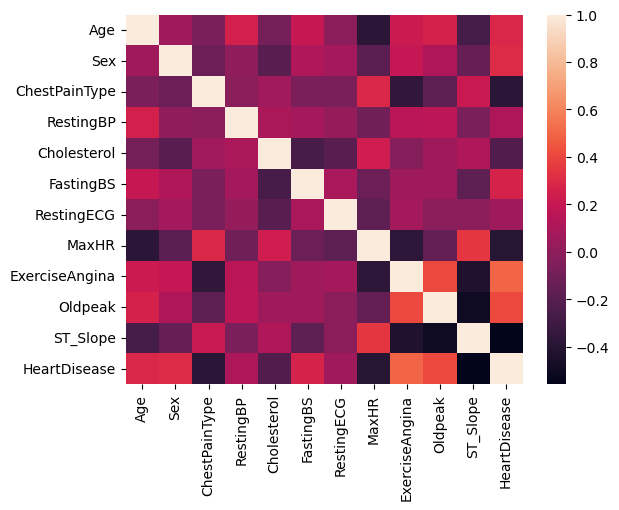

In [51]:
sns.heatmap(df.corr())

# Scatter Plot

<Axes: ylabel='RestingBP'>

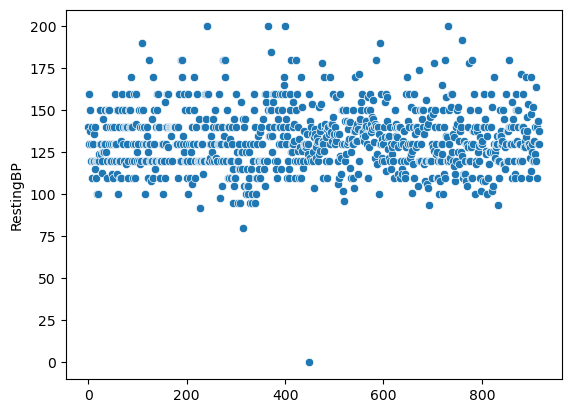

In [52]:
sns.scatterplot(df['RestingBP'])

# Using Plotly.express library

In [53]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.scatter(df ,x = 'Age',y = 'RestingBP')
fig.show()

In [54]:
fig = px.line(df, y='RestingBP')
fig.show()

# Joint Plot

The difference is that Jointplot shows all possible combinations of columns present in the dataset. 
Pairplot shows only the columns which hold numerical values

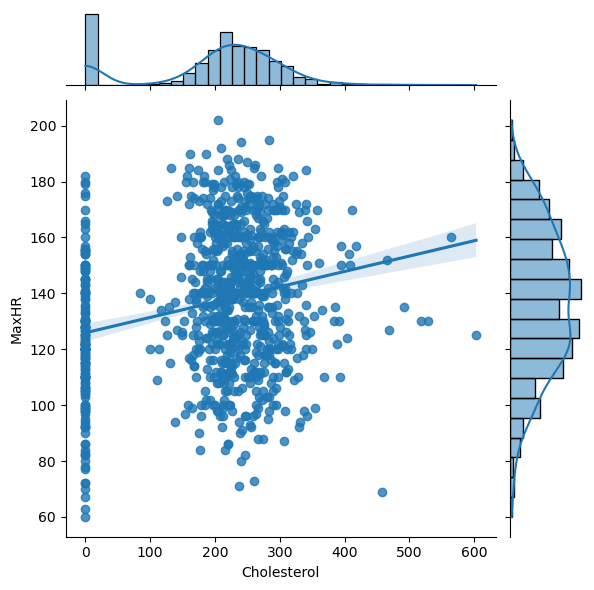

In [55]:
sns.jointplot(x = 'Cholesterol' , y = 'MaxHR', data = df, kind = 'reg')#regression

So from this we can see based on Cholesterol how the MaxHR is changing.

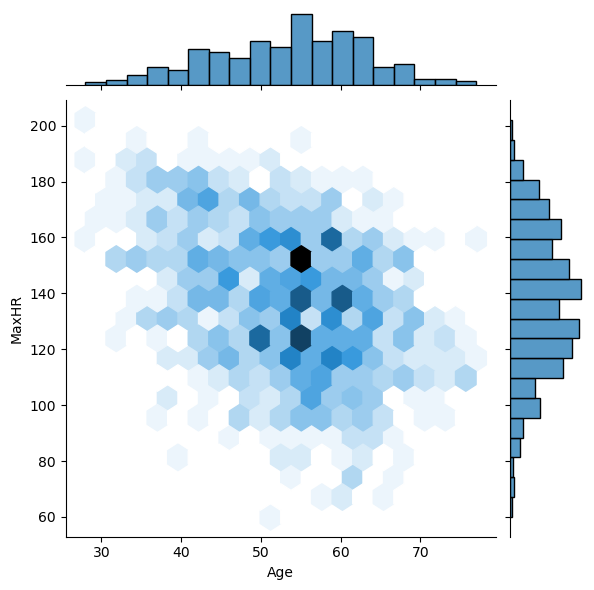

In [56]:
sns.jointplot(x = 'Age' , y = 'MaxHR', data = df, kind = 'hex')#hexagon


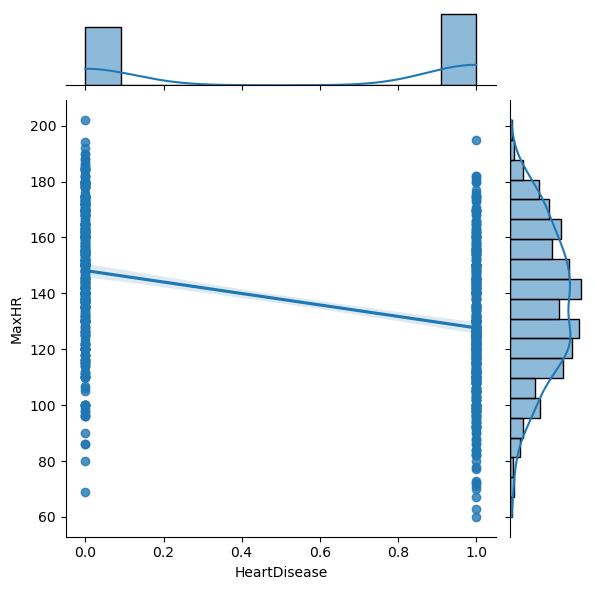

In [57]:
sns.jointplot(x = 'HeartDisease' , y = 'MaxHR', data = df, kind = 'reg')

# Pairplot

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



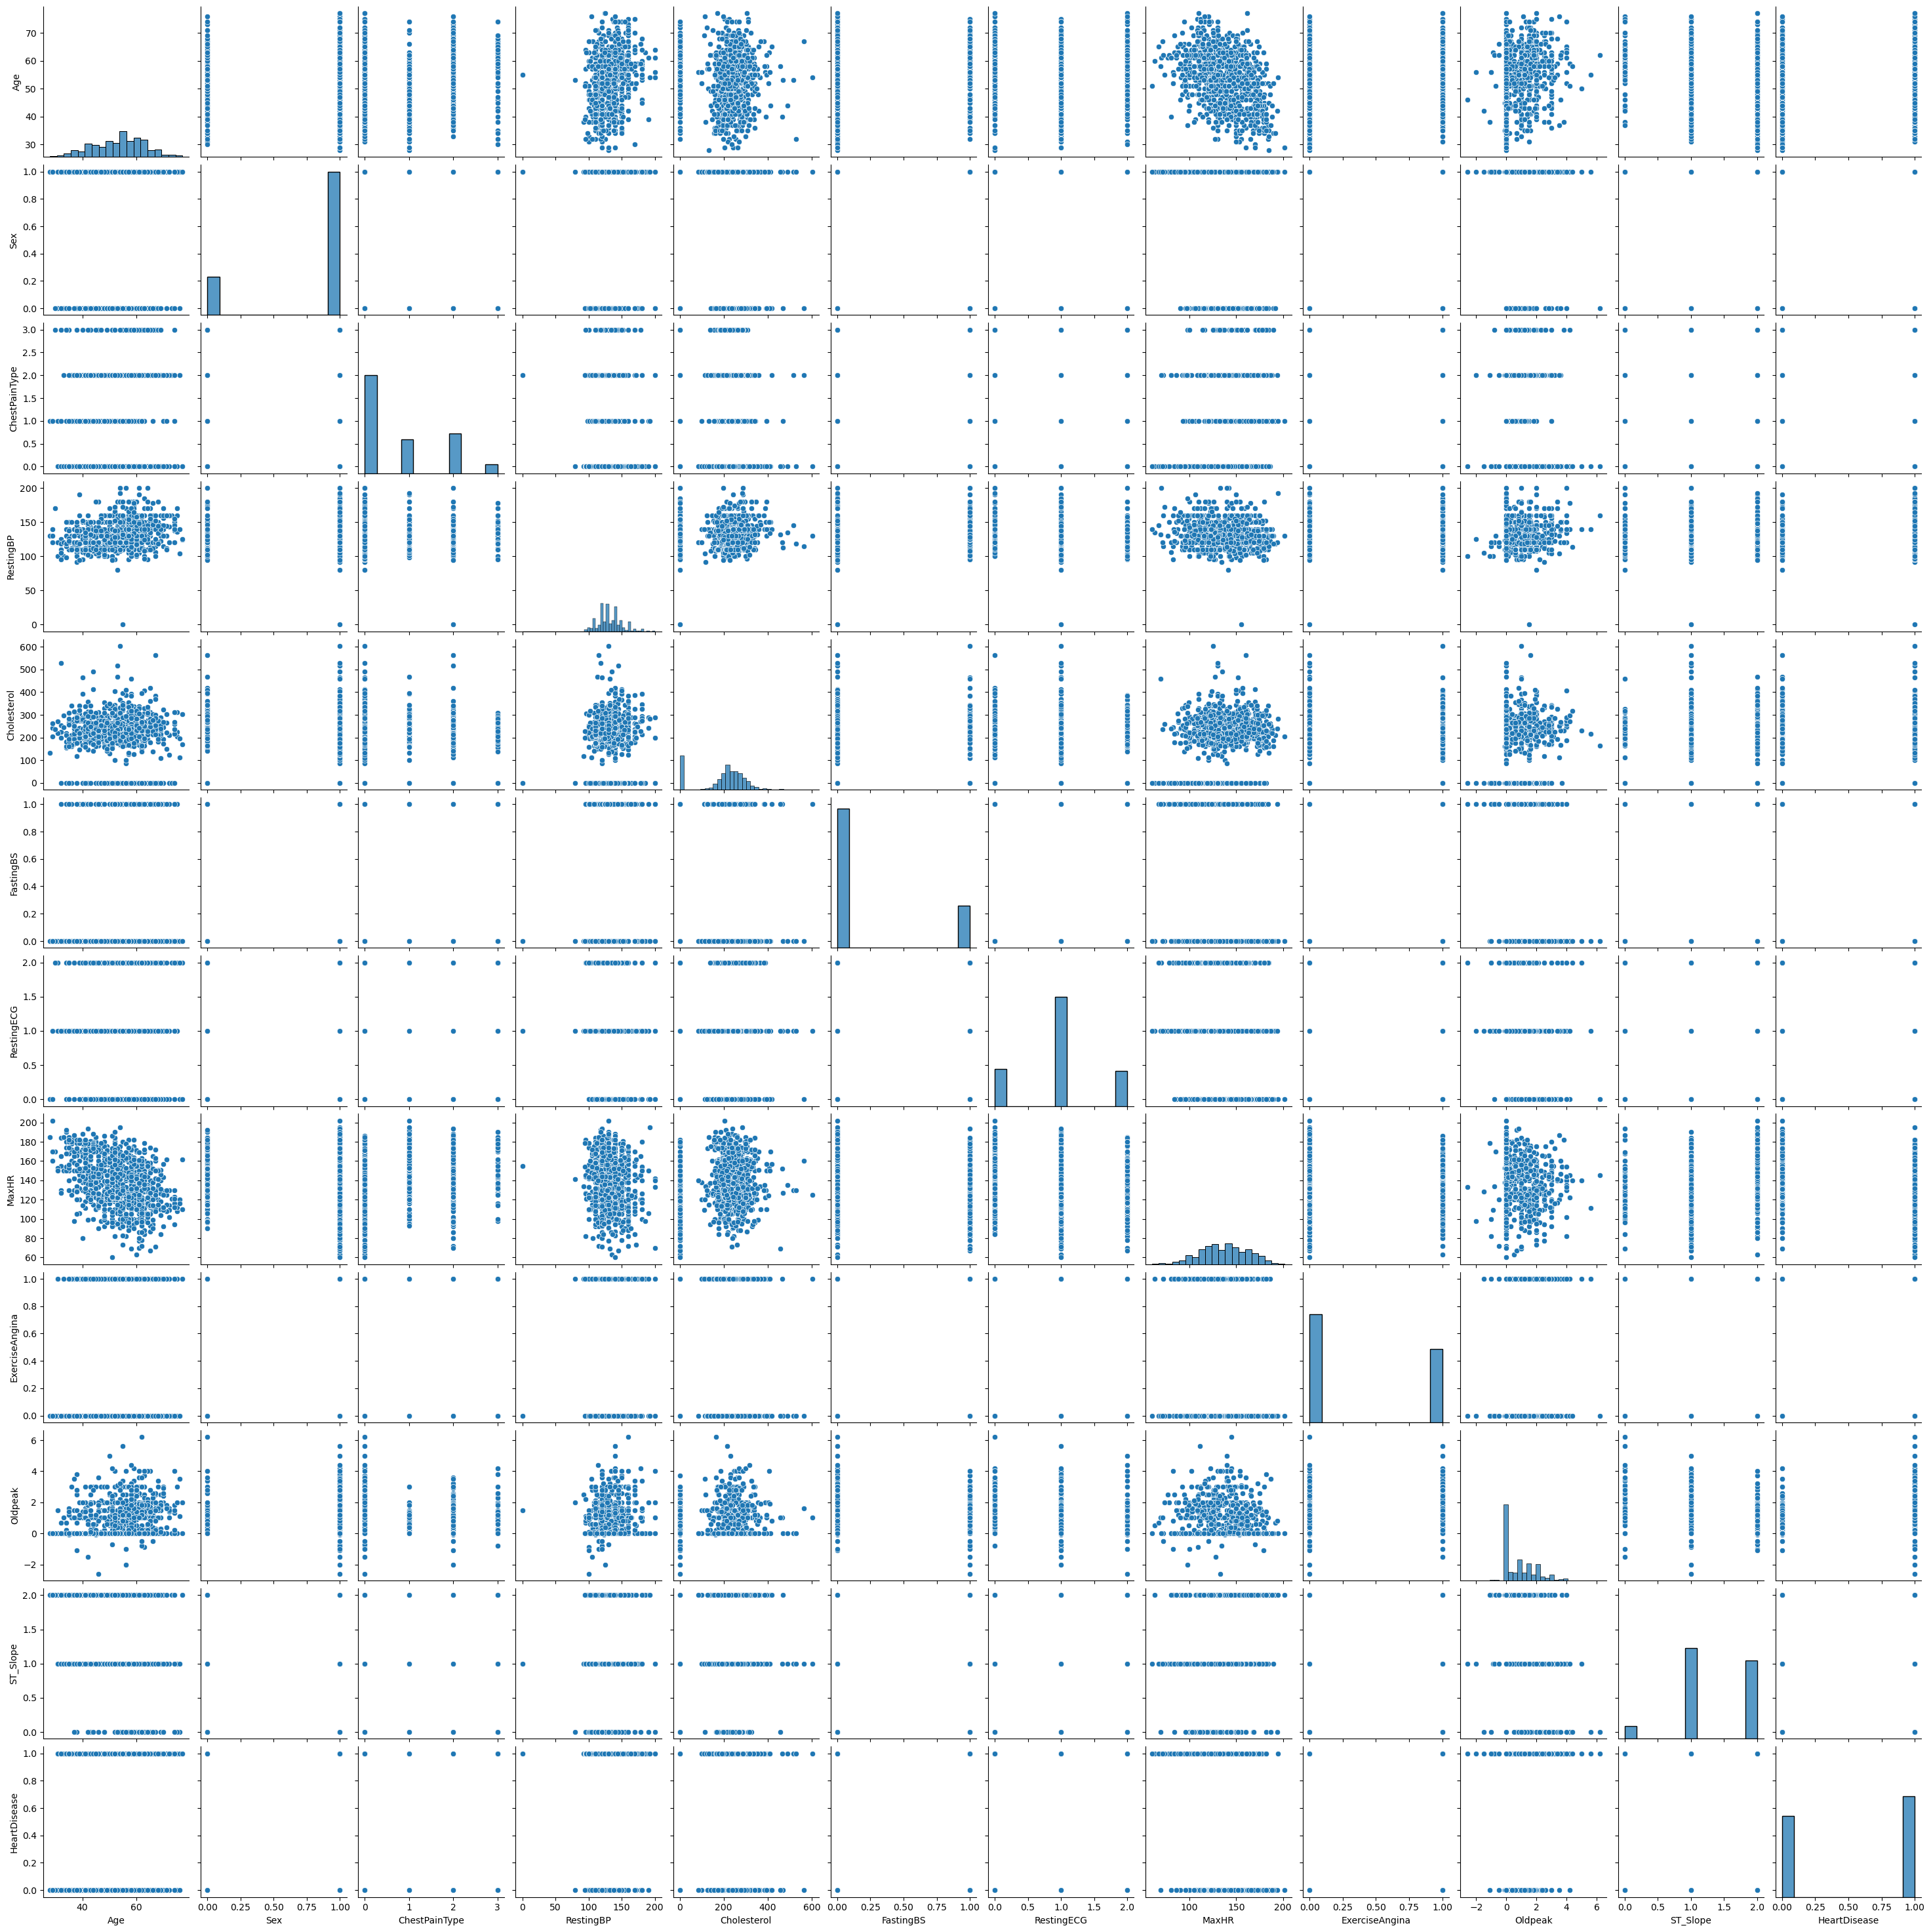

In [58]:
sns.pairplot(df)

# 1 . LOGISTIC REGRESSION

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [67]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train,y_train)
y_pred  = LR.predict(X_test)

In [69]:
logistic_accuracy = accuracy_score(y_test,y_pred )
logistic_conf_matrix = confusion_matrix(y_test, y_pred)
logistic_class_report = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Confusion Matrix:\n", logistic_conf_matrix)
print("Logistic Regression Classification Report:\n", logistic_class_report)

Logistic Regression Accuracy: 0.8659420289855072
Logistic Regression Confusion Matrix:
 [[100  12]
 [ 25 139]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

